<h2>Introduction</h2>

This kernel is a preliminary EDA with main focus on the Crimes in Chicago dataset. I explore various questions that are of interest to me and also some questions that have risen while exploring this dataset. After every plot I put a small comments section to express my thoughts at the time. In addition this can serve as an introduction to how powerfull <b>Pandas</b> and the <b>Seaborn</b> libraries are.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='white', context='notebook', palette='deep')

In [2]:
data = pd.read_csv("../input/Chicago_Crimes_2012_to_2017.csv")

<h2>Data Preprocessing</h2>

We first need to drop all the columns that are not of interest in this kernel.

In [3]:
data.drop(labels=['Case Number','ID', 'Block', 'Ward', 'Community Area', 'FBI Code', 'Year', 'Updated On',
                 'Latitude','Longitude', 'Beat'] , inplace=True, axis=1)

In [4]:
# convert dates to pandas datetime format
data.Date = pd.to_datetime(data.Date, format='%m/%d/%Y %I:%M:%S %p')
# setting the index to be the date will help us a lot later on
data.index = pd.DatetimeIndex(data.Date)

We then view the remaining columns that we will be dealing with.

In [5]:
data.head(10)

,Unnamed: 0,Date,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,X Coordinate,Y Coordinate,Location
Date,,,,,,,,,,,,
2016-05-03 23:40:00,3,2016-05-03 23:40:00,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,10.0,1154907.0,1893681.0,"(41.864073157, -87.706818608)"
2016-05-03 21:40:00,89,2016-05-03 21:40:00,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,3.0,1183066.0,1864330.0,"(41.782921527, -87.60436317)"
2016-05-03 23:31:00,197,2016-05-03 23:31:00,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,15.0,1140789.0,1904819.0,"(41.894908283, -87.758371958)"
2016-05-03 22:10:00,673,2016-05-03 22:10:00,0460,BATTERY,SIMPLE,SIDEWALK,False,False,15.0,1143223.0,1901475.0,"(41.885686845, -87.749515983)"
2016-05-03 22:00:00,911,2016-05-03 22:00:00,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,15.0,1139890.0,1901675.0,"(41.886297242, -87.761750709)"
2016-05-03 22:35:00,1108,2016-05-03 22:35:00,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,6.0,1183336.0,1850642.0,"(41.745354023, -87.603798903)"
2016-05-03 22:30:00,1130,2016-05-03 22:30:00,0460,BATTERY,SIMPLE,CHA HALLWAY/STAIRWELL/ELEVATOR,False,False,1.0,1176730.0,1886544.0,"(41.844023772, -87.626923253)"
2016-05-03 21:30:00,1801,2016-05-03 21:30:00,0460,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,2.0,1178514.0,1874573.0,"(41.811133958, -87.62074077)"
2016-05-03 16:00:00,1868,2016-05-03 16:00:00,0460,BATTERY,SIMPLE,SIDEWALK,False,False,24.0,1165696.0,1942616.0,"(41.99813061, -87.665814038)"


After plotting the data based on the <b>X Coordinate</b> and <b>Y Coordinates</b> I noticed some incorrect values centered at <i><b>(0,0)</b></i>. Therefore we have to remove those values.

In [6]:
data[['X Coordinate', 'Y Coordinate']] = data[['X Coordinate', 'Y Coordinate']].replace(0, np.nan)
data.dropna()


,Unnamed: 0,Date,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,X Coordinate,Y Coordinate,Location
Date,,,,,,,,,,,,
2016-05-03 23:40:00,3,2016-05-03 23:40:00,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,10.0,1154907.0,1893681.0,"(41.864073157, -87.706818608)"
2016-05-03 21:40:00,89,2016-05-03 21:40:00,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,3.0,1183066.0,1864330.0,"(41.782921527, -87.60436317)"
2016-05-03 23:31:00,197,2016-05-03 23:31:00,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,15.0,1140789.0,1904819.0,"(41.894908283, -87.758371958)"
2016-05-03 22:10:00,673,2016-05-03 22:10:00,0460,BATTERY,SIMPLE,SIDEWALK,False,False,15.0,1143223.0,1901475.0,"(41.885686845, -87.749515983)"
2016-05-03 22:00:00,911,2016-05-03 22:00:00,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,15.0,1139890.0,1901675.0,"(41.886297242, -87.761750709)"
2016-05-03 22:35:00,1108,2016-05-03 22:35:00,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,6.0,1183336.0,1850642.0,"(41.745354023, -87.603798903)"
2016-05-03 22:30:00,1130,2016-05-03 22:30:00,0460,BATTERY,SIMPLE,CHA HALLWAY/STAIRWELL/ELEVATOR,False,False,1.0,1176730.0,1886544.0,"(41.844023772, -87.626923253)"
2016-05-03 21:30:00,1801,2016-05-03 21:30:00,0460,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,2.0,1178514.0,1874573.0,"(41.811133958, -87.62074077)"
2016-05-03 16:00:00,1868,2016-05-03 16:00:00,0460,BATTERY,SIMPLE,SIDEWALK,False,False,24.0,1165696.0,1942616.0,"(41.99813061, -87.665814038)"


<h2>Beginning of EDA</h2>

To get a sense of what we are dealing with, we first group by <b>Primary Type</b> and sort based on their <b>frequency</b> in <b>descending</b> order.

In [7]:
data.groupby('Primary Type').size().sort_values(ascending=False)

Primary Type
THEFT                                329460
BATTERY                              263700
CRIMINAL DAMAGE                      155455
NARCOTICS                            135240
ASSAULT                               91289
OTHER OFFENSE                         87874
BURGLARY                              83397
DECEPTIVE PRACTICE                    75495
MOTOR VEHICLE THEFT                   61138
ROBBERY                               57313
CRIMINAL TRESPASS                     36912
WEAPONS VIOLATION                     17233
PUBLIC PEACE VIOLATION                13122
OFFENSE INVOLVING CHILDREN            11398
PROSTITUTION                           7633
CRIM SEXUAL ASSAULT                    6823
INTERFERENCE WITH PUBLIC OFFICER       6195
SEX OFFENSE                            4885
HOMICIDE                               2649
ARSON                                  2217
GAMBLING                               2212
LIQUOR LAW VIOLATION                   1953
KIDNAPPING         

<b>Comments</b> : <ul>
<li>Seems like the most prevalent crimes are <b>Theft</b> and <b>Battery</b></li>
<li>However the list is diverse with both minor and some serious offences occuring infrequently.</li></ul>

Let's dive in to different districts though. I first create a plot with all the crimes in our dataset color coded by their districts so that we can get a feel of what the different district boundaries are.

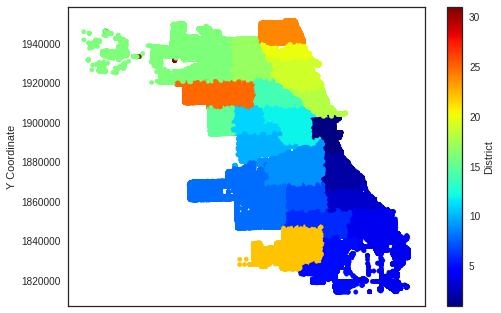

In [8]:
data.plot(kind='scatter',x='X Coordinate', y='Y Coordinate', c='District', cmap=plt.get_cmap('jet'))

<b>Comments</b><ul>
<li>We see that all districts have a number of crimes associated with them </li>
<li>Which districts have the <b>most</b> though are they centralised somewhere ? </li></ul> 

Let us see if any clusters are formed or if any areas are more prone to crime than others

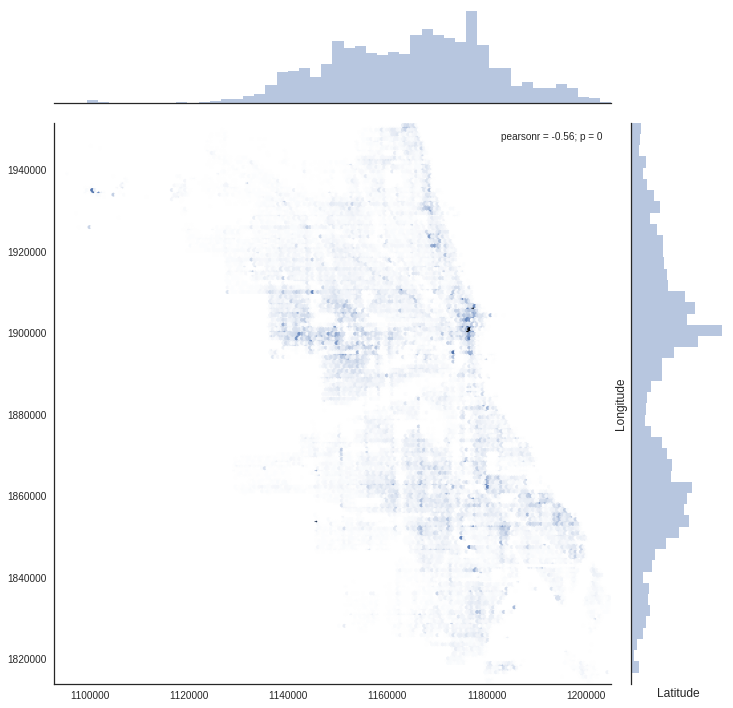

In [9]:
plt.figure(figsize=(12,12))
sns.jointplot(x=data['X Coordinate'].values, y=data['Y Coordinate'].values, size=10, kind='hex')
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

<b>Comments : </b>
<ul>
<li>We see that <b>North-West</b> Chicago has offences recorded than other areas.</li>
<li>In addition we see a cluster forming in <b>North-East</b> and <b>South-West</b></li>
However, which Districts are those ? And what is the most prevalent offence within those Districts ? 

Can we detect clusters based on <b>Primary Type</b>. In other words do certain offences occur more frequently or exclusively in a certain area ?

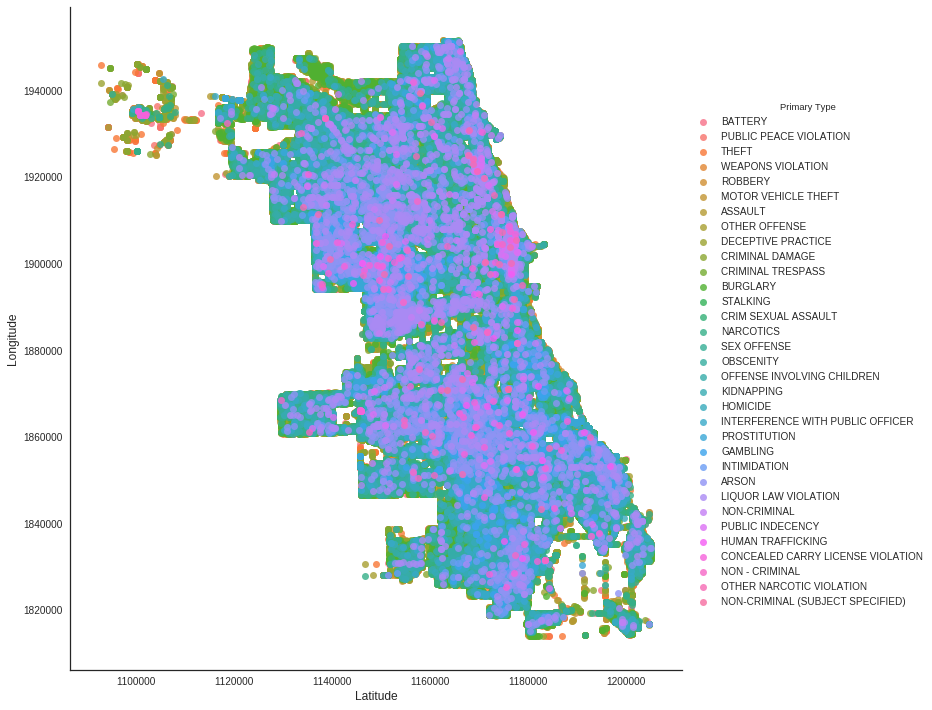

In [10]:
plt.figure(figsize=(12,12))
sns.lmplot(x='X Coordinate', y='Y Coordinate', size=10, hue='Primary Type', data=data, fit_reg=False)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

<b>Comments</b>
<ul>
<li> We cannot really make sense of this as no type of crime occurs only in one area</li>

<h2>Second part of EDA</h2>

In this part I focus more on the particular <b>Districts</b> individually. I first create a plot of the <b>TOP-<i>k</i></b> crimes in each district. With <i>k=3</i>

In [11]:
#Getting top k
topk = data.groupby(['District', 'Primary Type']).size().reset_index(name='counts').groupby('District').apply(lambda x: x.sort_values('counts',ascending=False).head(3))
print(topk)

              District        Primary Type  counts
District                                          
1.0      30        1.0               THEFT   29523
         8         1.0  DECEPTIVE PRACTICE    7671
         2         1.0             BATTERY    6308
2.0      61        2.0               THEFT   13734
         34        2.0             BATTERY   11678
         37        2.0     CRIMINAL DAMAGE    6354
3.0      65        3.0             BATTERY   15978
         92        3.0               THEFT   11739
         69        3.0     CRIMINAL DAMAGE    8226
4.0      96        4.0             BATTERY   17761
         123       4.0               THEFT   14549
         100       4.0     CRIMINAL DAMAGE   10476
5.0      127       5.0             BATTERY   14144
         154       5.0               THEFT   10184
         131       5.0     CRIMINAL DAMAGE    8007
6.0      158       6.0             BATTERY   18198
         185       6.0               THEFT   16326
         162       6.0     CRIM

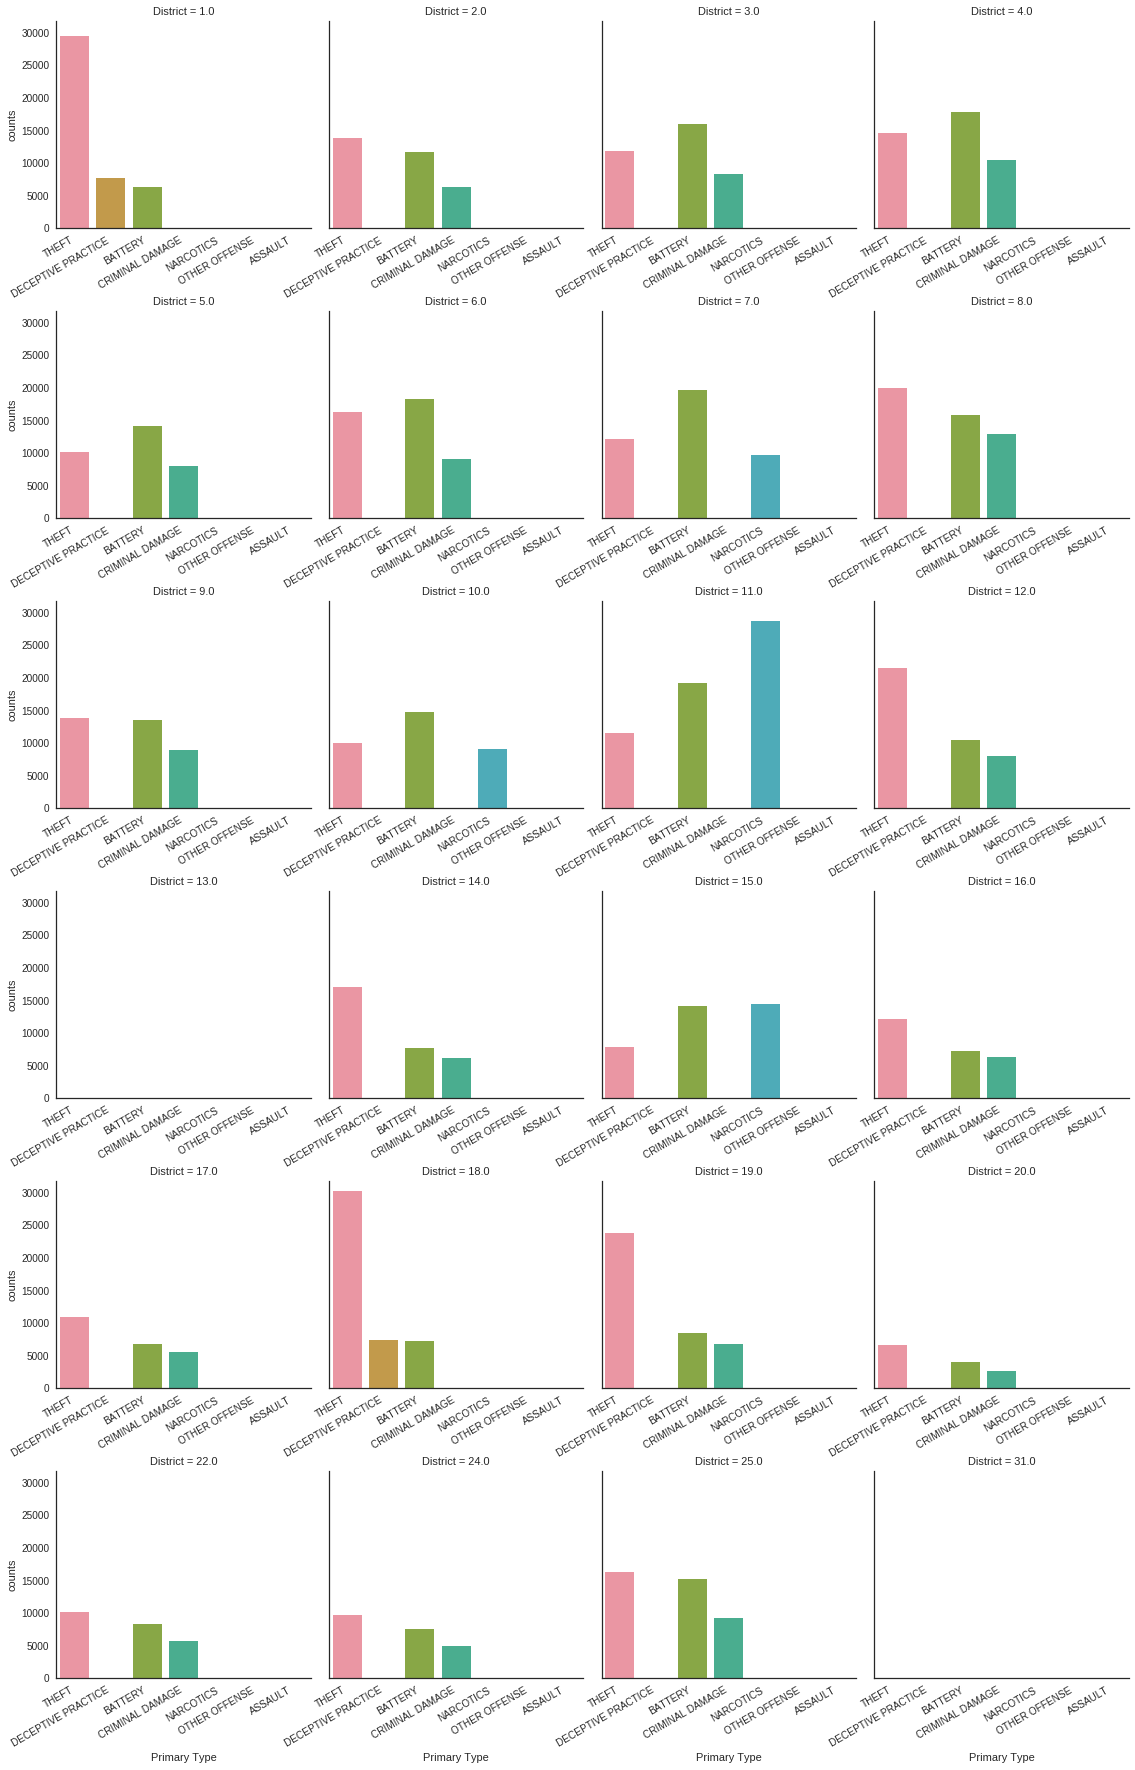

In [12]:
#Plotting top-k per district
g =sns.factorplot("Primary Type", y='counts', col="District", col_wrap=4,
                   data=topk, kind='bar')
for ax in g.axes:
    plt.setp(ax.get_xticklabels(), visible=True, rotation=30, ha='right')

plt.subplots_adjust(hspace=0.4)

<b>Comments</b>
<ul>
<li>First of all we notice that for Districts <b>13</b> and <b>31</b> the number of crimes is really small that is not evident in our graphs</li>
<li><b>Theft</b> and <b>Battery</b> occur in every other district</li>
<li><b>Deceptive Practise</b> is most prevalent in Districts <b>1</b> and <b>18</b></li>
<li><b>Narcotics</b> are focused at Districts <b>7, 10, 11, 15</b></li>
</ul>
Can we see if types of crimes are focused in neighbouring districts ?

Next we create a plot indicating the <b>District</b> and its most <b>frequent</b> type of offence along with its <b>frequency</b>

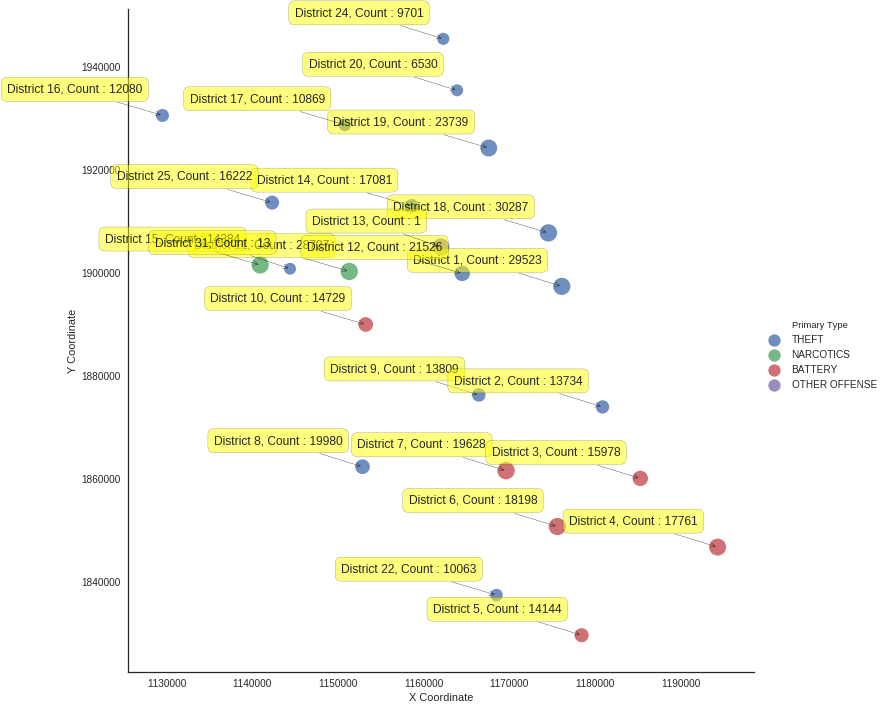

In [13]:
sdf = data.groupby(['District', 'Primary Type']).size().reset_index(name='counts')
idx = sdf.groupby(['District'])['counts'].transform(max) == sdf['counts']
sdf = sdf[idx]
other = data.groupby('District')[['X Coordinate', 'Y Coordinate']].mean()

sdf = sdf.set_index('District').join(other)
sdf = sdf.reset_index().sort_values("counts",ascending=False)
sns.lmplot(x='X Coordinate', y='Y Coordinate',size=10, hue='Primary Type', data=sdf,scatter_kws={"s": sdf['counts'].apply(lambda x: x/100.0)}, fit_reg=False)

for r in sdf.reset_index().as_matrix():

    district = "District {0}, Count : {1}".format(int(r[1]),int(r[3]))
    x = r[4]
    y = r[5]
    plt.annotate(
        district,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

<b>Comments</b>
<ul><li>Strangely enough there seems to be a grouping of districts with the same most ranked type of offence</li>
<li><b>Battery</b> types of crime are mostly occuring in <b>South</b> Chicago</li>
<li><b>Narcotics</b> are focused on two neighbouring districts <b>12</b> and <b>15</b>. However, the District between them (<b>31</b>) is one of the most safest.</li>
<li><b>Theft</b> is focused in the <b>North</b> of Chicago. It would be interesting to cross-examine that with other data and see if these districts are among the poorest. I will leave that to the reader or someone in the comments section.</li>

Let us see then, which are the most dangerous and which are the most safest districts.

In [14]:
sdf.sort_values("counts",ascending=False)

,District,Primary Type,counts,X Coordinate,Y Coordinate
17,18.0,THEFT,30287,1.174565e+06,1.907732e+06
0,1.0,THEFT,29523,1.176124e+06,1.897336e+06
10,11.0,NARCOTICS,28727,1.151320e+06,1.900232e+06
18,19.0,THEFT,23739,1.167601e+06,1.924221e+06
11,12.0,THEFT,21526,1.164502e+06,1.899853e+06
7,8.0,THEFT,19980,1.152875e+06,1.862294e+06
6,7.0,BATTERY,19628,1.169622e+06,1.861529e+06
5,6.0,BATTERY,18198,1.175604e+06,1.850667e+06
3,4.0,BATTERY,17761,1.194307e+06,1.846675e+06
13,14.0,THEFT,17081,1.158634e+06,1.912934e+06


<b>Comments</b>
<ul>
<li>Districts <b>18,1,11</b> are the first three and are all close in proximity.</li>
<li>What is strange though, is that districts <b>31,13</b> which are the safest are also close in proximity</li>

Let us see what the Police are doing about those crimes though. What is the number of successful <b>arrests</b> per district ?

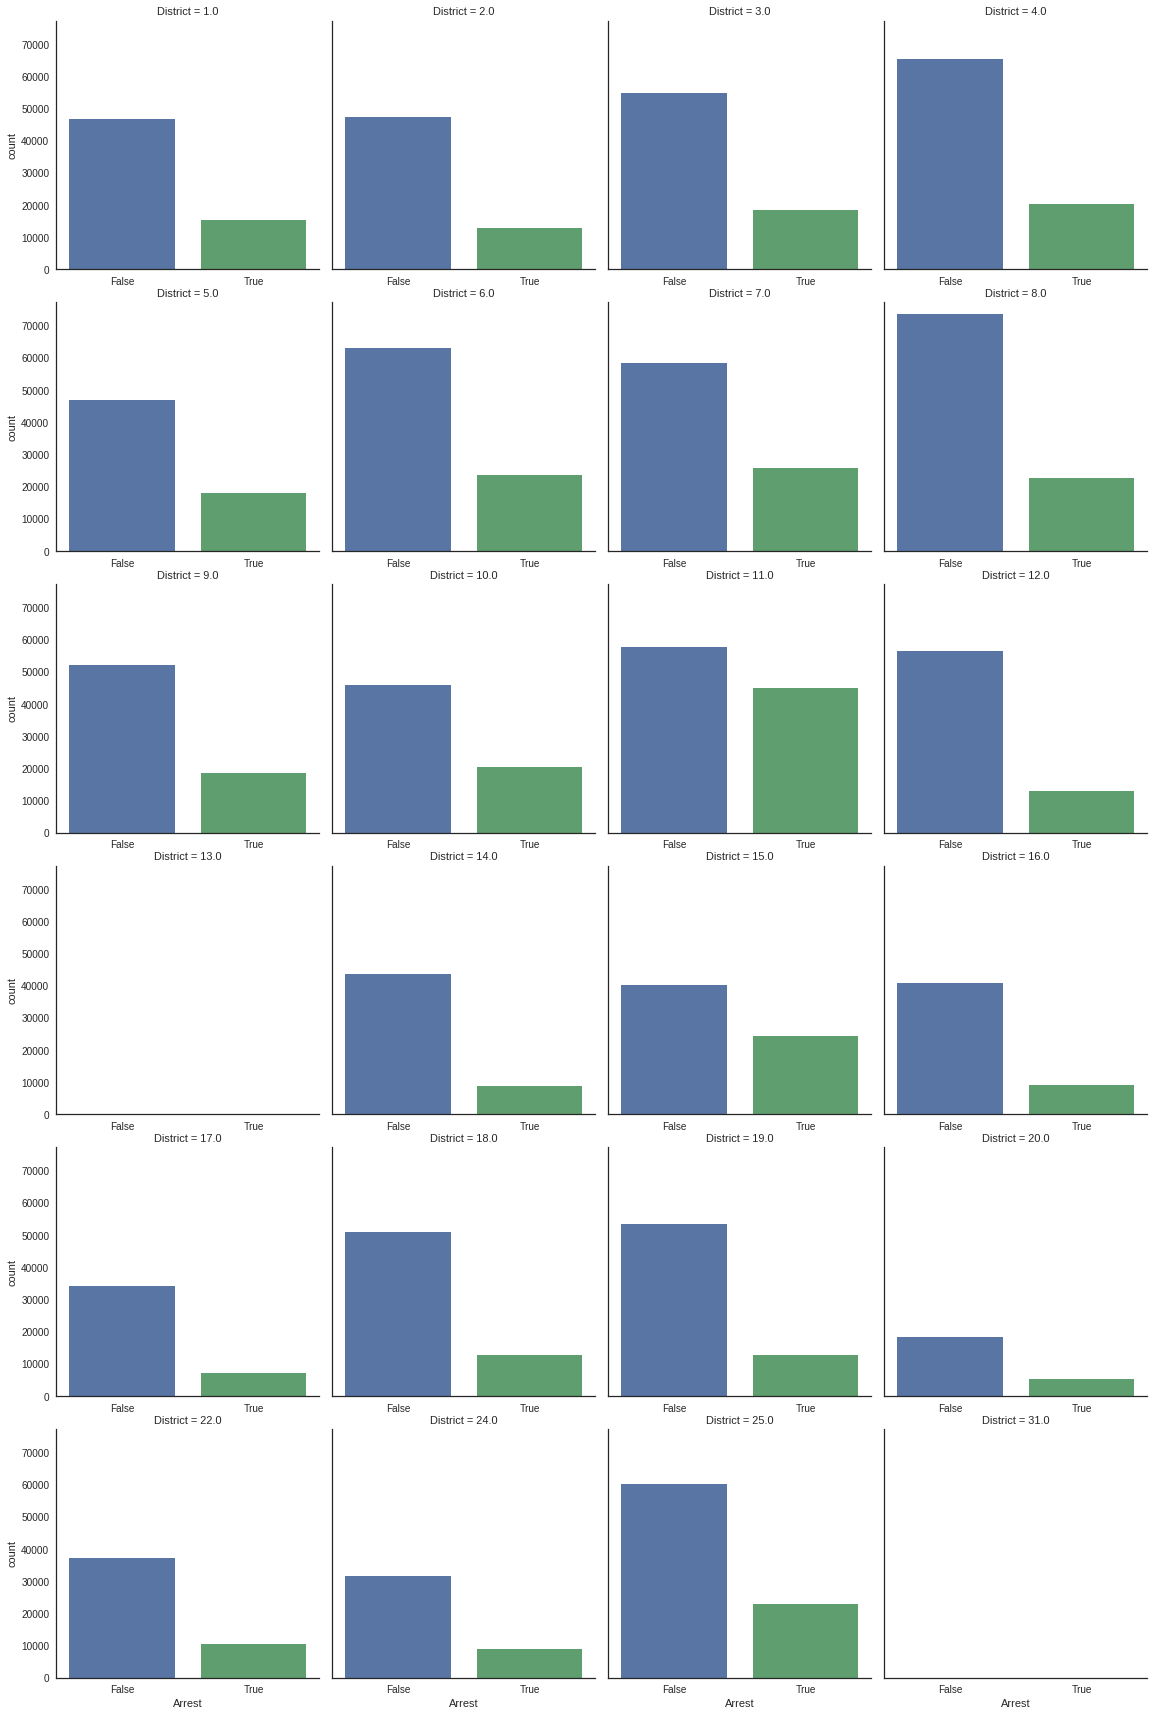

In [15]:
g =sns.factorplot("Arrest", col="District", col_wrap=4, legend_out=True,
                   data=data, orient='h',
                    kind="count")
for ax in g.axes:
    plt.setp(ax.get_xticklabels(), visible=True)

<b>Comments</b>
<ul>
<li>It seems that <b>ALL</b> districts have a problem with arrest rates. The number of arrests=<b>False</b> is always larger than arrests=<b>True</b>. However, this does not mean that an arrest was <i>unsuccessful</i> or that the criminal got away. It might mean that a warning was given because of the nature of the crime.</li>

Let us explore that by plotting <b>Arrest</b> per <b>Primary Type</b>

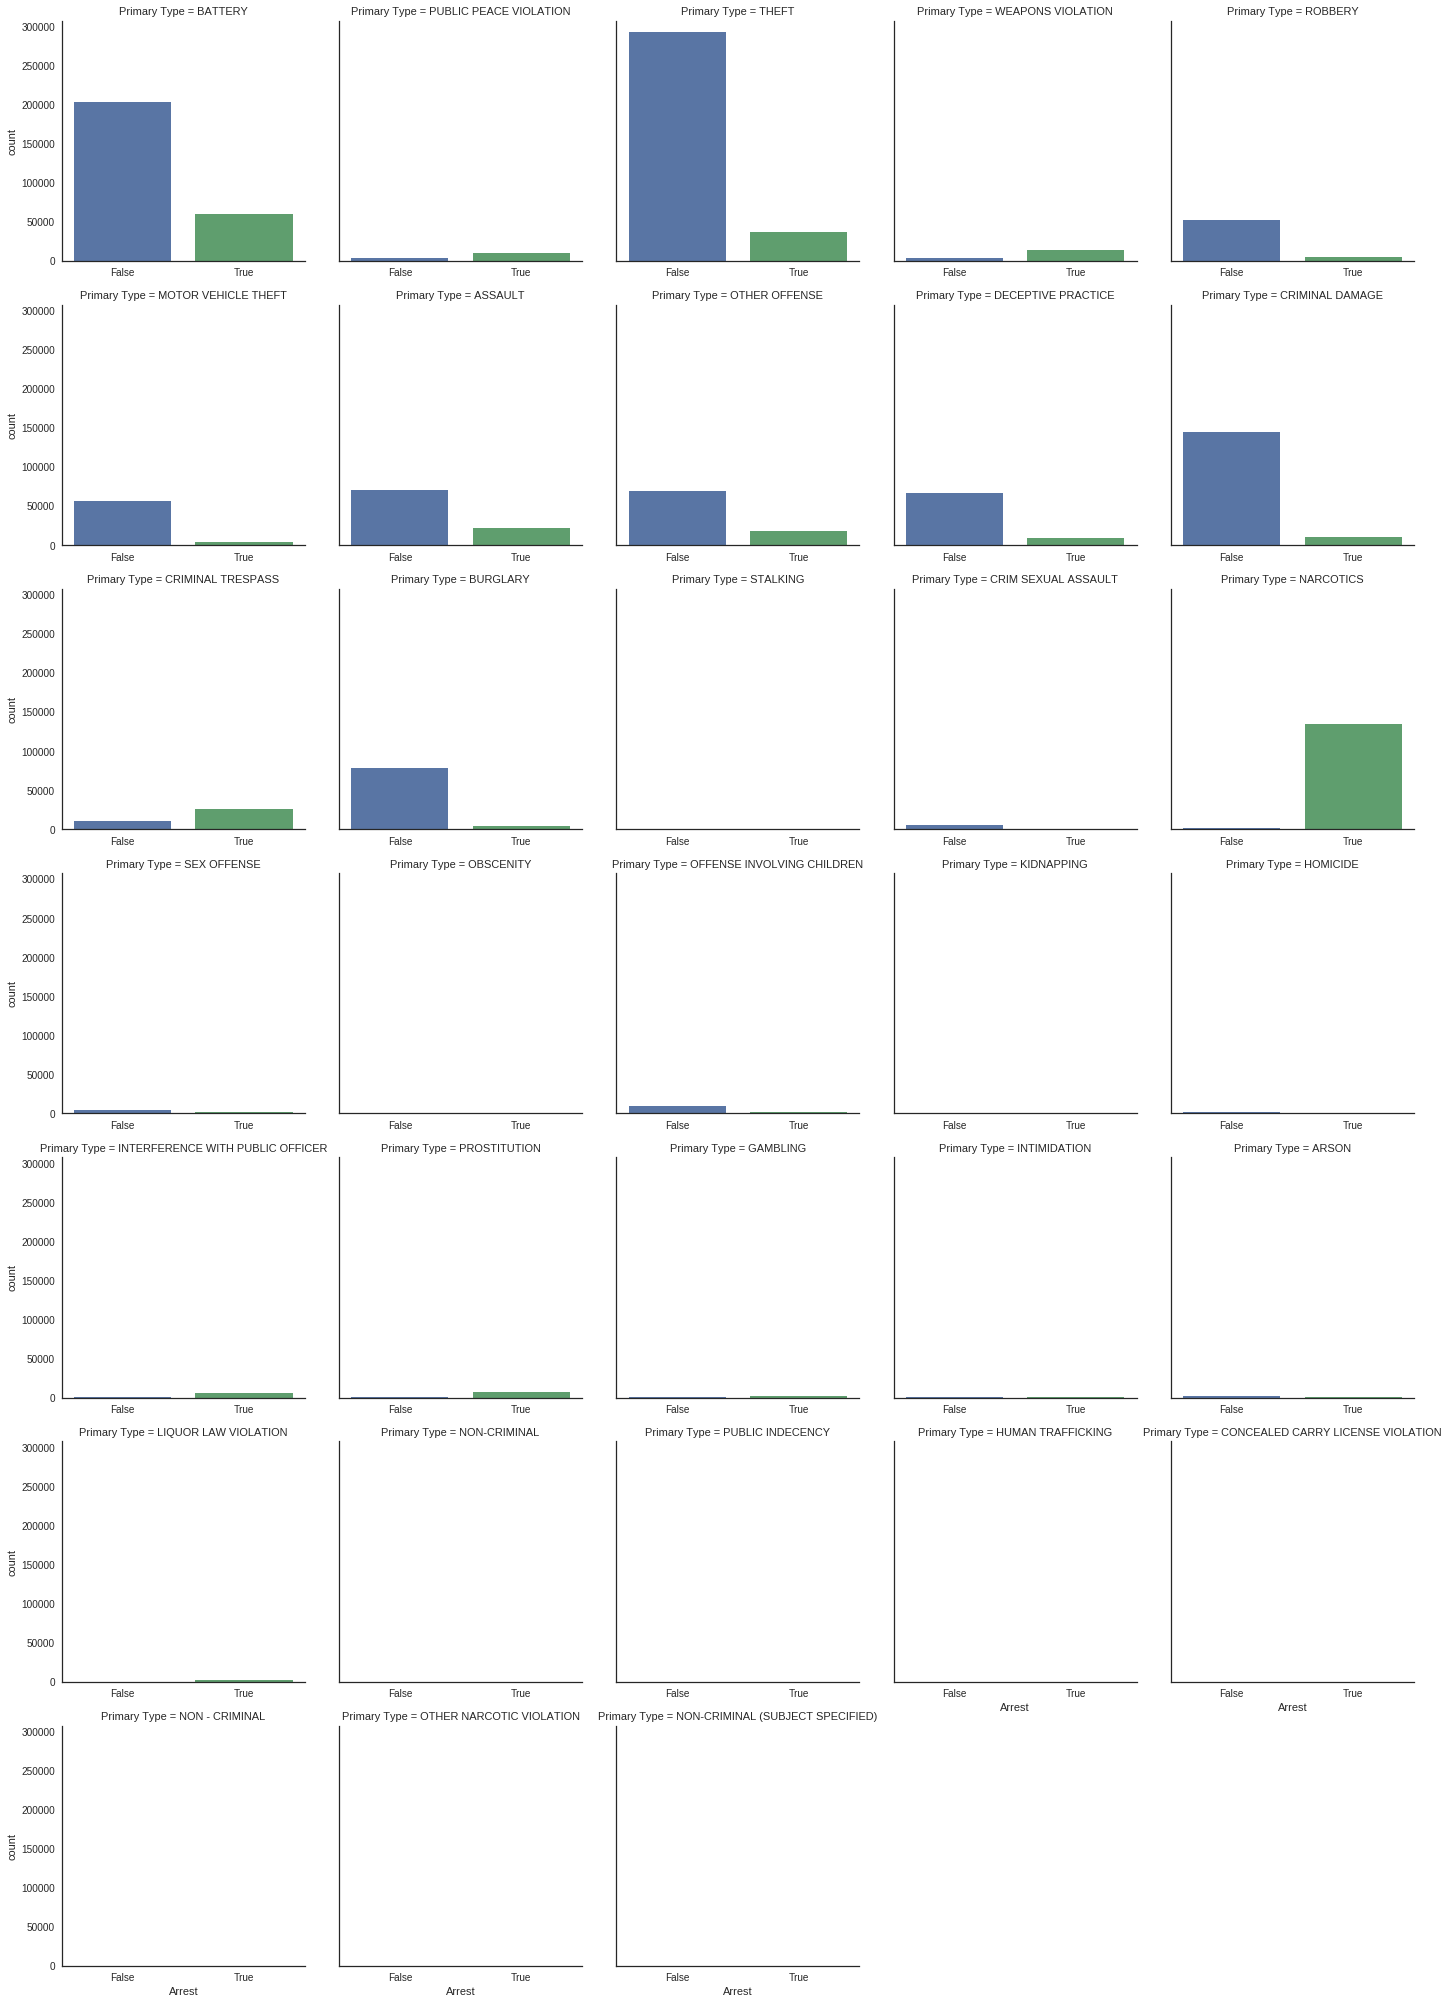

In [16]:
g =sns.factorplot("Arrest", col="Primary Type", col_wrap=5, legend_out=True,
                   data=data, orient='h',
                    kind="count")
for ax in g.axes:
    plt.setp(ax.get_xticklabels(), visible=True)

<b>Comments</b>
<ul>
<li>At a first glance it seems that the <i>Arrest=False</i> might mean <i>unsuccessful</i> after all.</li>
<li>It seems that the Police is particularly unsuccesful on offences having to do with <b>Theft, Battery, Assault, Burglary, Motor Vehicle Theft</b>. In general if the crime committed involves stealing, the Police is under-performing.</li>
<li>On the other hand, they are doing a pretty good job on <b>Narcotics, Weapons Violation, Criminal Tresspass, Prostitution and Public Peace Violations, Interference with Public officer.</b>. Although we don't know if by Narcotics they mean regular people smoking canabis or organized crime. 
</ul>

<h2>Temporal EDA</h2>

Let's see if there is an overall drop in crime rate over the years.

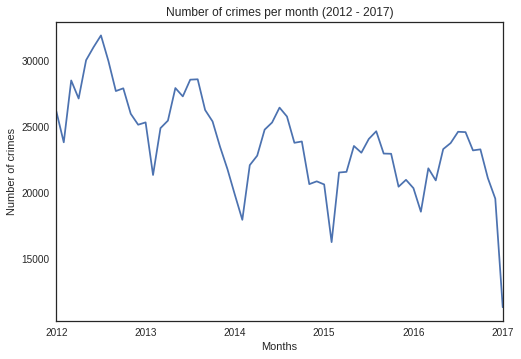

In [17]:
data.resample('M').size().plot(legend=False)
plt.title('Number of crimes per month (2012 - 2017)')
plt.xlabel('Months')
plt.ylabel('Number of crimes')
plt.show()

<b>Comments</b>
<ul>
<li>Seems that there is a drop.</li>
</ul>
Let us see if this is the same per District though.

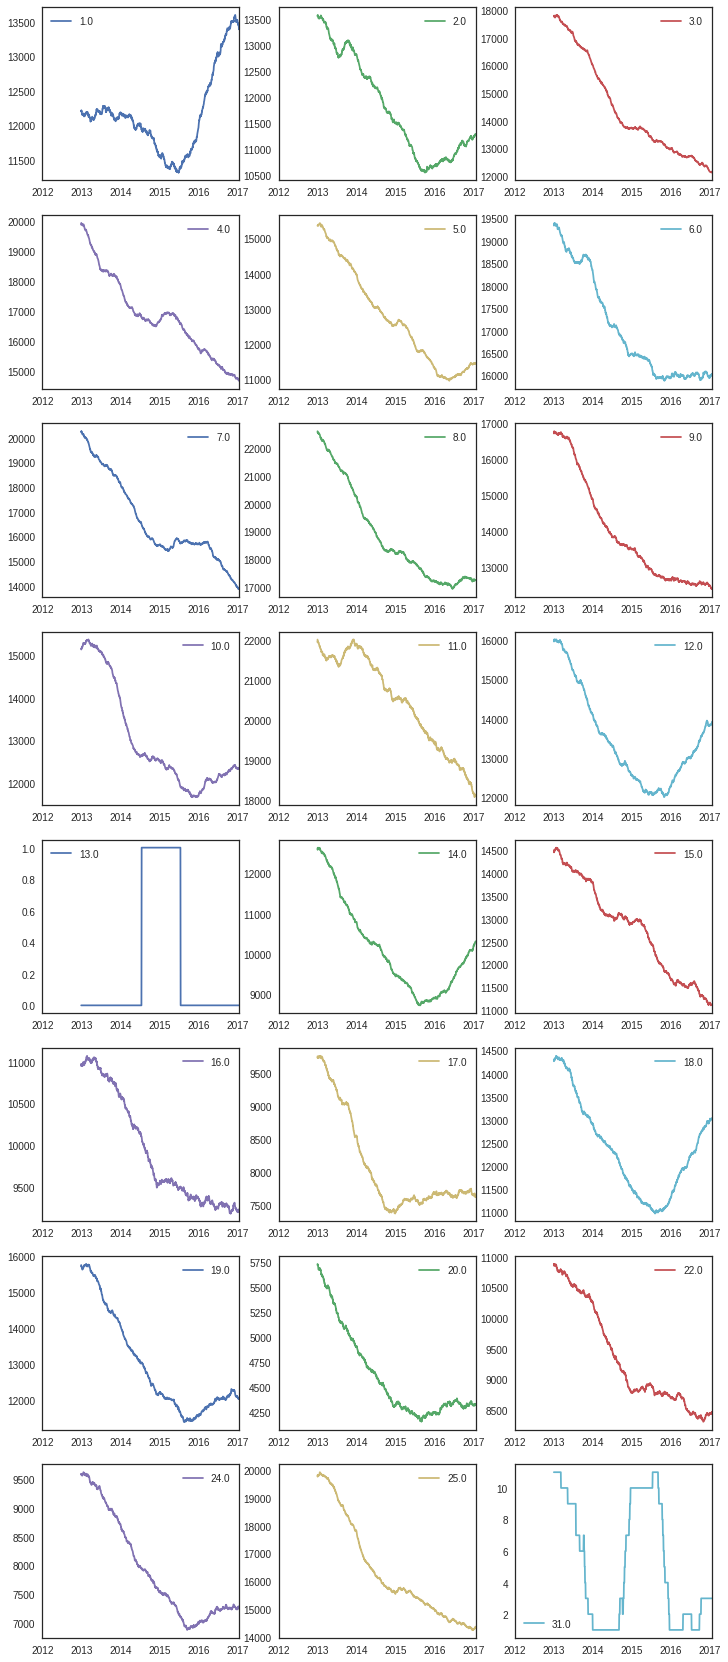

In [18]:
crimes_per_district = data.pivot_table('Date', aggfunc=np.size, columns='District', index=data.index.date, fill_value=0)
crimes_per_district.index = pd.DatetimeIndex(crimes_per_district.index)
plo = crimes_per_district.rolling(365).sum().plot(figsize=(12, 30), subplots=True, layout=(-1, 3), sharex=False, sharey=False)

<b>Comments</b>
<ul>
<li>We see mixed results here. And at a glance the statement that crime rate has dropped is <b>NOT</b> true. At least not for every district</li>
<li>Particulary for <b>18, 14, 1, 12</b> crime rates have risen dramatically</li>
<li>Overall I get that looks can be deceiving at first</li>
</ul>

<h3>Let's dive in to the particular Location Descriptions for each crime</h3>

We start by taking the <b>top-k</b> crimes per <b>Primary Type</b> per <b>Location<b/>. <i>k</i> is set to 3.

In [19]:
#where does each crime occur more often
topk_loc_descr = data.groupby(['Primary Type', 'Location Description']).size().reset_index(name='counts').groupby('Primary Type').apply(lambda x: x.sort_values('counts',ascending=False).head(3))

We can the plot a heatmap indicating the frequency of each crime per Location Description. In other words we will see where does each particular crime type occur more often.

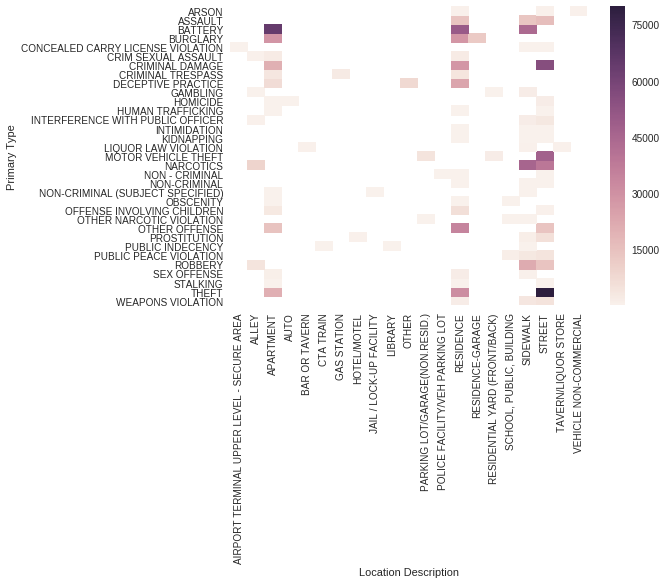

In [20]:
pivotdf = topk_loc_descr.pivot(index='Primary Type', columns='Location Description', values='counts')
sns.heatmap(pivotdf)

<b>Comments</b>
<ul>
<li>We see that the most "<i>dangerous</i>" places are : <b>Apartment, Residence, Sidewalk and Street</b>. But let's explore that a bit more.</li>
<li>Let's take a look at <b>Street</b> and <b>Sidewalk</b>. It makes sense that Theft, Narcotics, Motor Vehicle theft and Battery will mostly happen in the streets.</li> Nothing strange about those.
<li>For Residence we see Theft, Burglary, Deceptive Practise and Criminal Damage which are expected. But we also see Assault and Battery. But that could be explained by the "type" of Residence.</li>
<li> Let us move on to the Apartment. Burglary and Theft are common offences. However, what troubles me is Battery. Is it other people breaking into your Aparment and then attacking you or is it domestic violence ?</li>
</ul>

Let's use <b>factorplot</b> once again to see if most occurences of Battery are products of Domestic Violence

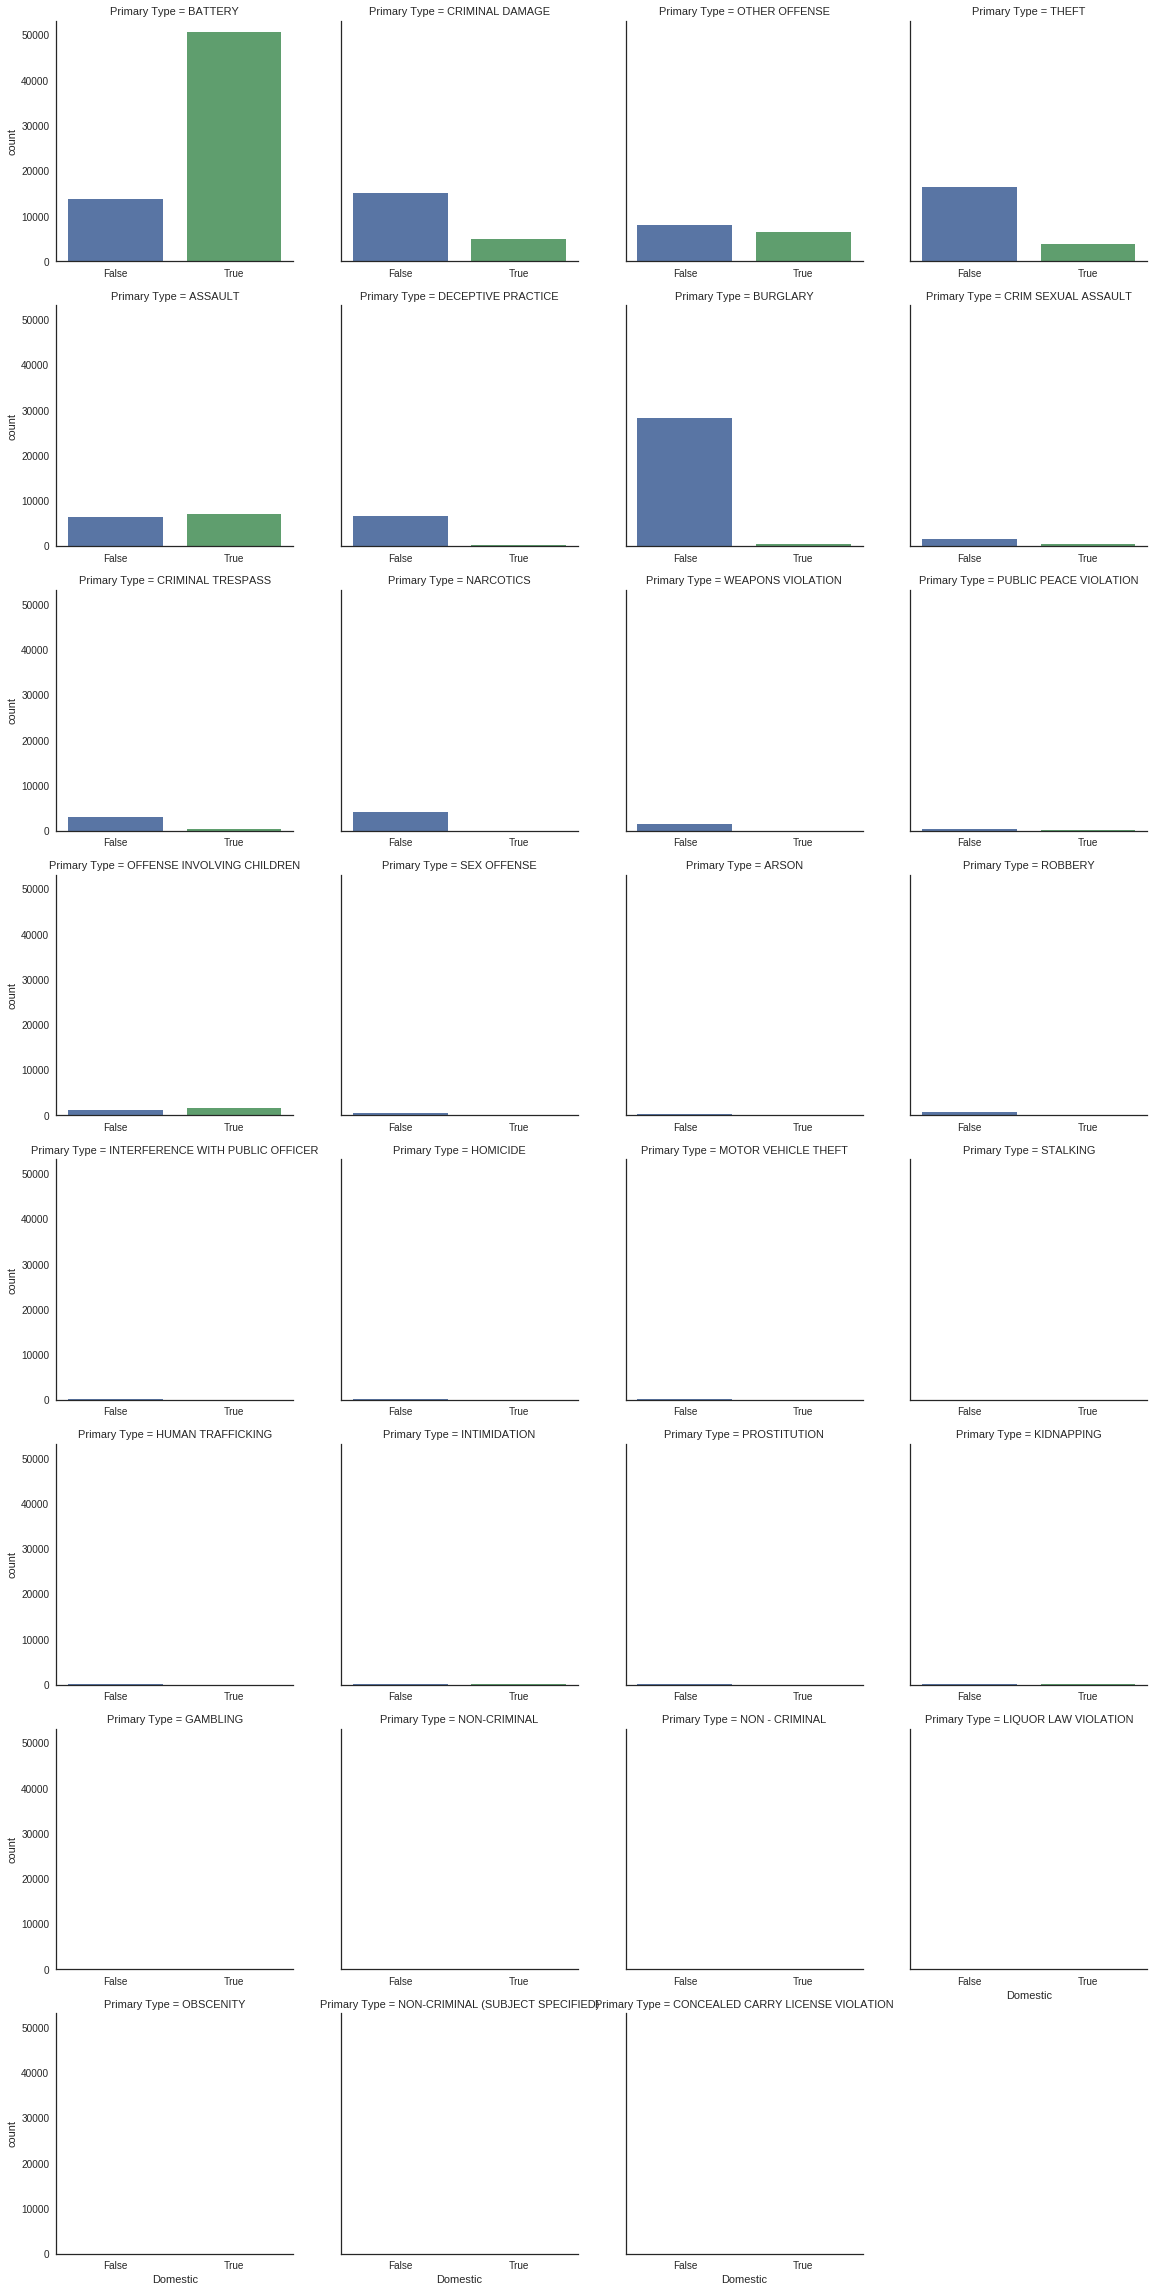

In [21]:
#were most of crimes occured in residence and apartments causes of domestic violence ?
apartmentdf = data[data['Location Description']=='APARTMENT']
g =sns.factorplot("Domestic", col="Primary Type", col_wrap=4, legend_out=True,
                   data=apartmentdf, orient='h',
                    kind="count")
for ax in g.axes:
    plt.setp(ax.get_xticklabels(), visible=True)

<b>Comments</b>
<ul>
<li>And indeed Battery and Assault in Aparment is mostly the product of Domestic Violence. Tragically this is the same for Offence involving children</li>

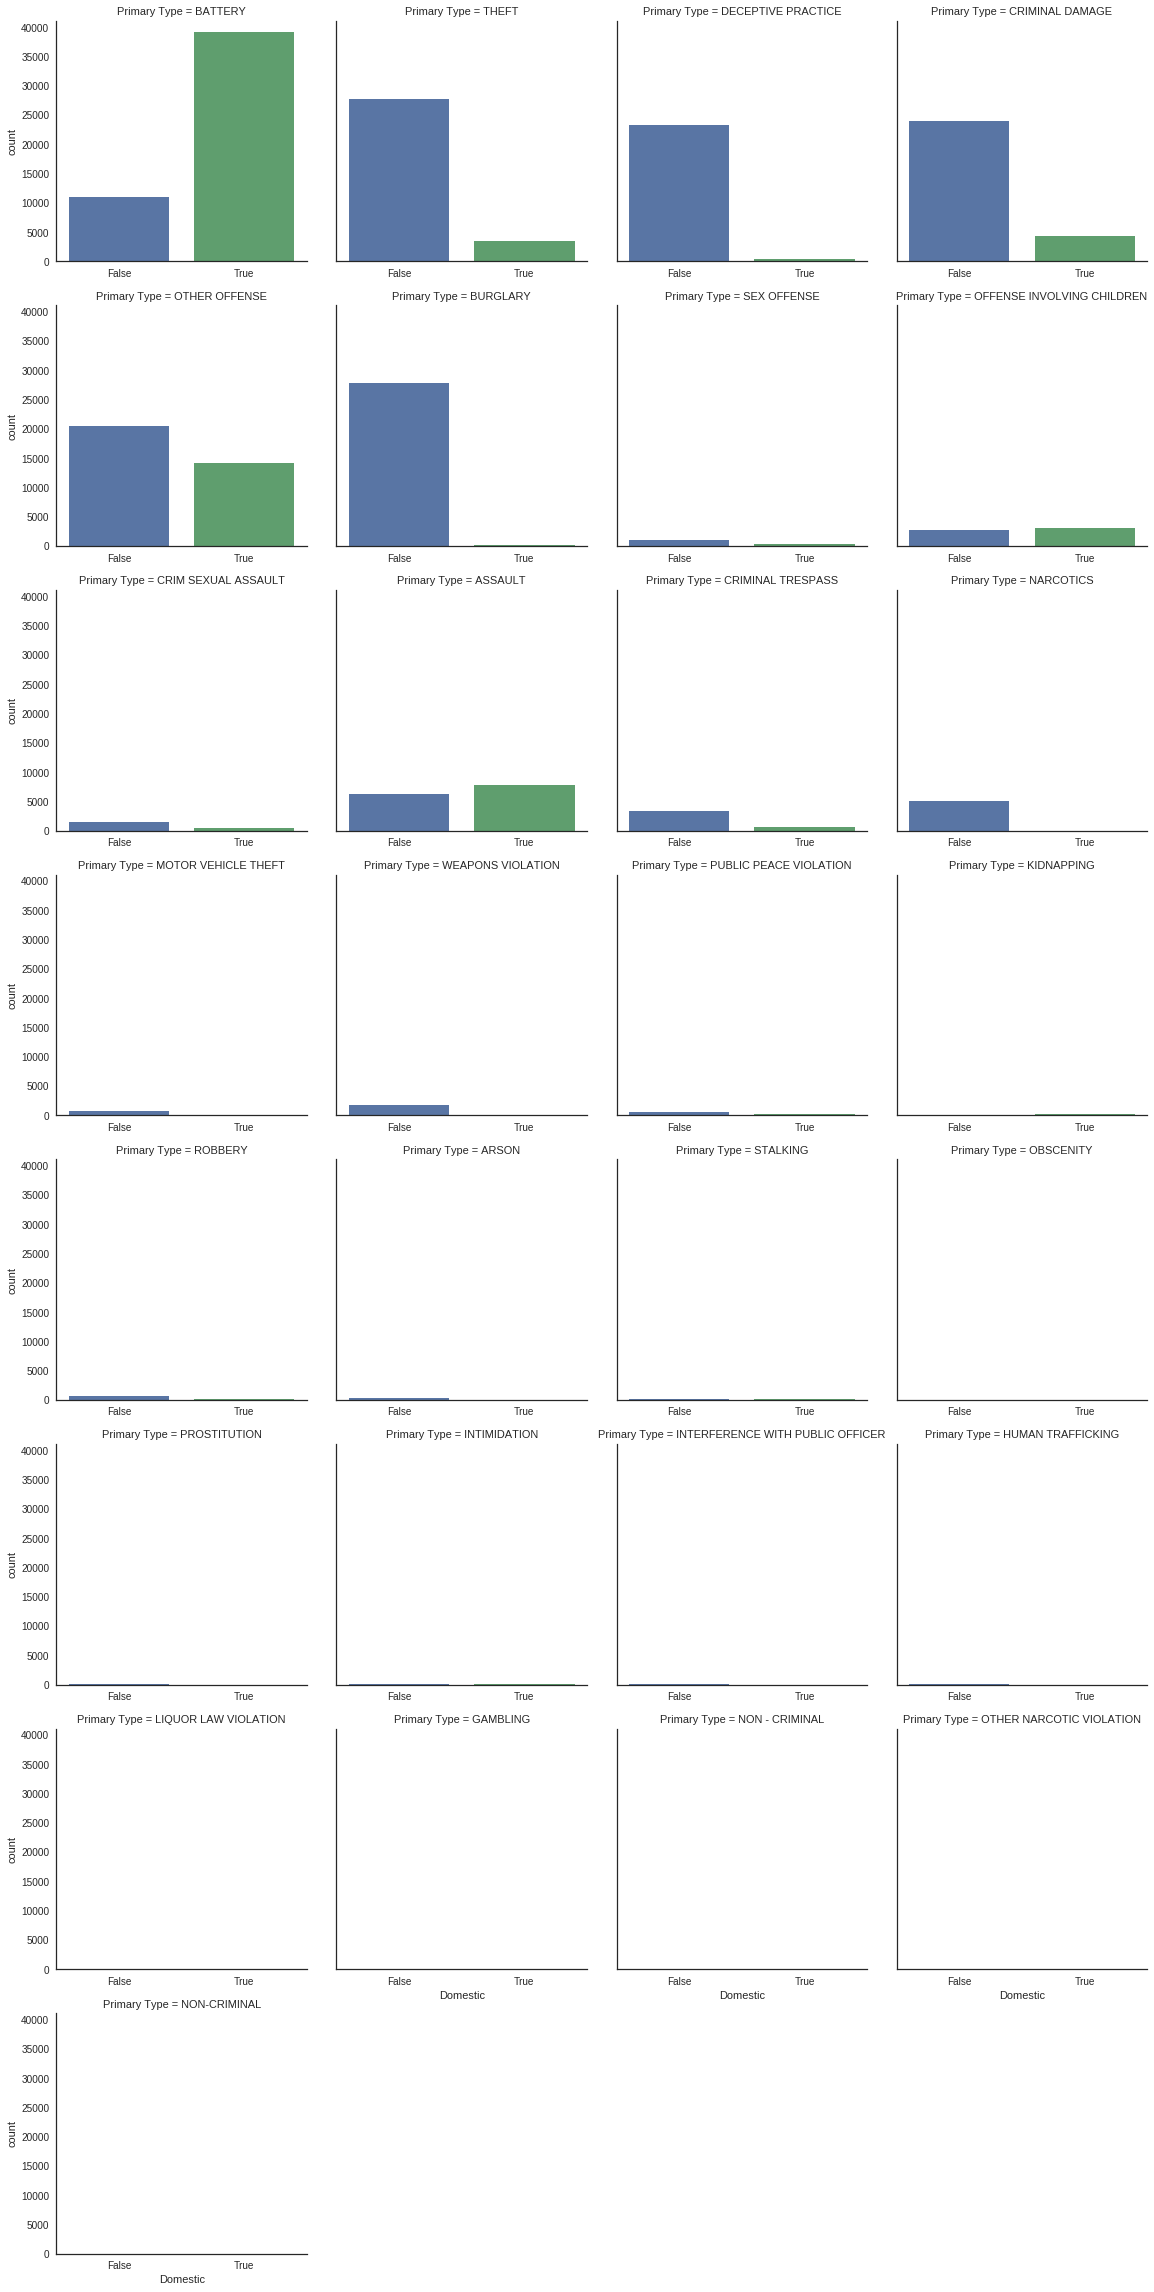

In [22]:
#were most of crimes occured in residence and apartments causes of domestic violence ?
apartmentdf = data[data['Location Description']=='RESIDENCE']
g =sns.factorplot("Domestic", col="Primary Type", col_wrap=4, legend_out=True,
                   data=apartmentdf, orient='h',
                    kind="count")
for ax in g.axes:
    plt.setp(ax.get_xticklabels(), visible=True)

<b>Comments</b>
<ul>
<li>The same for Aparment holds for Residence as well.</li>